In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1 0': 1024}


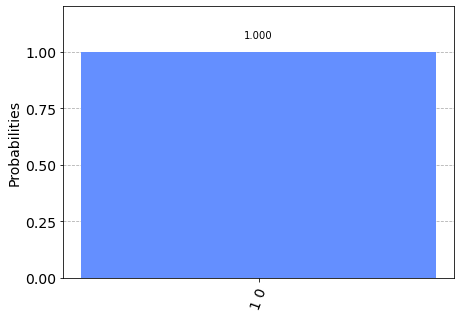

In [2]:
q = QuantumRegister(5)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc = QuantumCircuit(q, c0, c1, name="grover2")

# superposição de todos os estados da base
qc.h(q[1])
qc.h(q[2])

qc.x(q[1])
#qc.x(q[2])
qc.cz(q[1],q[2]) # |11> -> -|11>
qc.x(q[1])
#qc.x(q[2])

#qc.s(q[2]) # f(x)=x1 & 'x2, mudança de fase qubit 2
#qc.h(q[2]) 
#qc.cx(q[1],q[2])
#qc.h(q[2])
#qc.s(q[2])

qc.h(q[1])
qc.h(q[2])
qc.x(q[1])
qc.x(q[2])

qc.h(q[2])
qc.cx(q[1],q[2])
qc.h(q[2])

qc.x(q[1])
qc.x(q[2])
qc.h(q[1])
qc.h(q[2])

qc.measure(q[1], c0[0])
qc.measure(q[2], c1[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

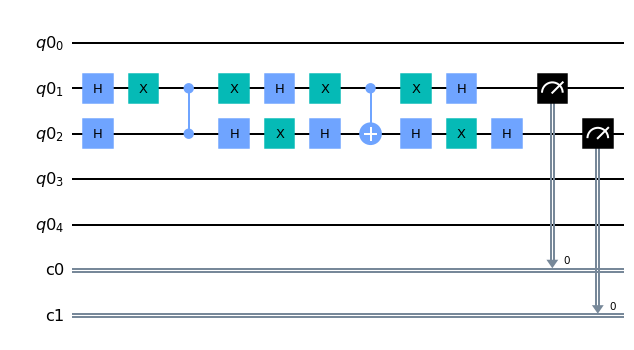

In [3]:
qc.draw(output='mpl')

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))